### Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.cm import ScalarMappable

In [2]:
df = pd.read_csv("supermarket_sales.csv")

In [3]:
df.shape

(1000, 17)

In [4]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
df.head(4)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4


In [7]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time

In [8]:
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00,Cash,76.40,4.761905,3.8200,9.6


In [9]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


# Drop Unnessary Columns

In [10]:
df.drop(columns='Invoice ID', inplace=True)

## Analyze Rating of Product Line

In [11]:
colors_bar = [
    '#1F77B4',  # Blue
    '#FF7F0E',  # Orange
    '#2CA02C',  # Green
    '#D62728',  # Red
    '#9467BD',  # Purple
    '#8C564B',  # Brown
    '#E377C2',  # Pink
    '#7F7F7F',  # Gray
    '#BCBD22',  # Lime
    '#17BECF',  # Teal
    '#FFBB78',  # Light Orange
    '#98DF8A',  # Light Green
    '#FF9896',  # Light Red
    '#C5B0D5',  # Light Purple
    '#C49C94'   # Light Brown
]

colors_xtick = [
    '#FFFFFF',  # White
    '#FF0000',  # Red
    '#00FF00',  # Green
    '#0000FF',  # Blue
    '#FF00FF',  # Magenta
    '#800000',  # Maroon
    '#808000',  # Olive
    '#008000',  # Dark Green
    '#800080',  # Purple
    '#808080',  # Gray
    '#C0C0C0',  # Silver
    '#FFC0CB',  # Pink
    '#A52A2A'   # Brown
]

colors_ytick = [
    '#FFFFFF',  # White
    '#FF00FF',  # Magenta
    '#00FF00',  # Green
    '#0000FF',  # Blue
    '#FF0000',  # Red
    '#800000',  # Maroon
    '#808000',  # Olive
    '#008000',  # Dark Green
    '#800080',  # Purple
    '#808080',  # Gray
    '#C0C0C0',  # Silver
    '#FFC0CB',  # Pink
    '#FFA500',  # Orange
    '#A52A2A',  # Brown
    '#7F7F7F',  # Medium Gray
    '#D3D3D3'   # Light Gray
]

# Define font dictionaries with color
title_font = {'fontsize': 16, 'fontweight': 'bold', 'family': 'serif', 'color': '#DC143C'}

subtitle_font = {'fontsize': 12, 'fontweight': 'light', 'family': 'serif', 'color': '#6A5ACD'}

label_font = {'fontsize': 10, 'family': 'sans-serif', 'color': '#7B68EE'}

In [12]:
rating = df.groupby('Product line')['Rating'].sum() # First we sum the rating of products

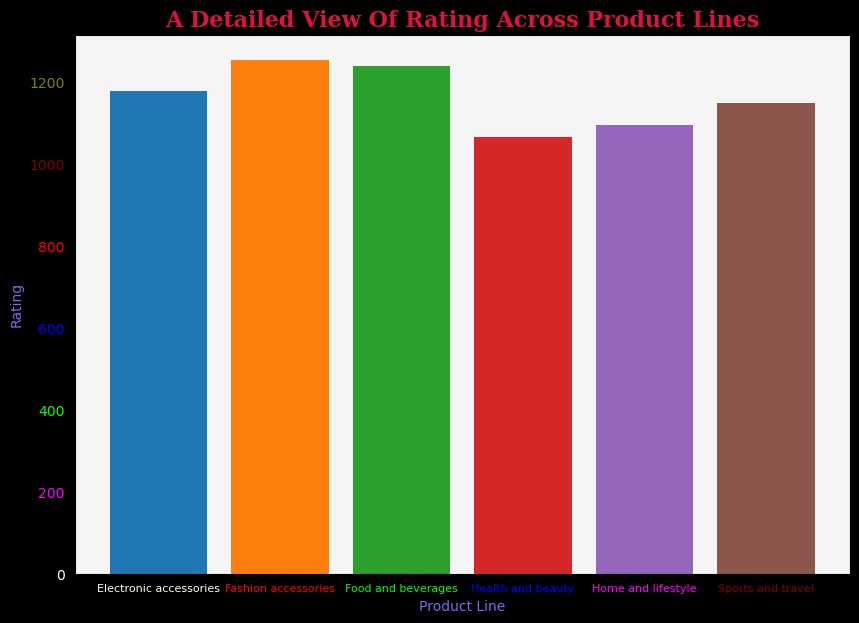

In [13]:
# Create the plot with specified figure size
fig, ax = plt.subplots(figsize=(10, 7))

# Create the bar chart
ax.bar(rating.index, rating.values, color=colors_bar)

# Set the background color of the figure and axes
fig.patch.set_facecolor('#000000')  # Figure background color (light gray)
ax.set_facecolor('#F5F5F5')  # Axes background color (black)


# Set titles and labels
ax.set_title('A Detailed View Of Rating Across Product Lines', fontdict=title_font)
ax.set_xlabel("Product Line", fontdict=label_font)
ax.set_ylabel("Rating",fontdict=label_font)

# Set the font size of x-tick labels
ax.tick_params(axis='x', labelsize=8)

# Set the color of the x-tick labels
for label, color in zip(ax.get_xticklabels(), colors_xtick):
    label.set_color(color)


# Set the color of the x-tick labels
for label, color in zip(ax.get_yticklabels(), colors_ytick):
    label.set_color(color)


# Show the plot
plt.show()


## Analyze Total Revenue

In [14]:
p_revenue = df.groupby('Product line')['Total'].sum()

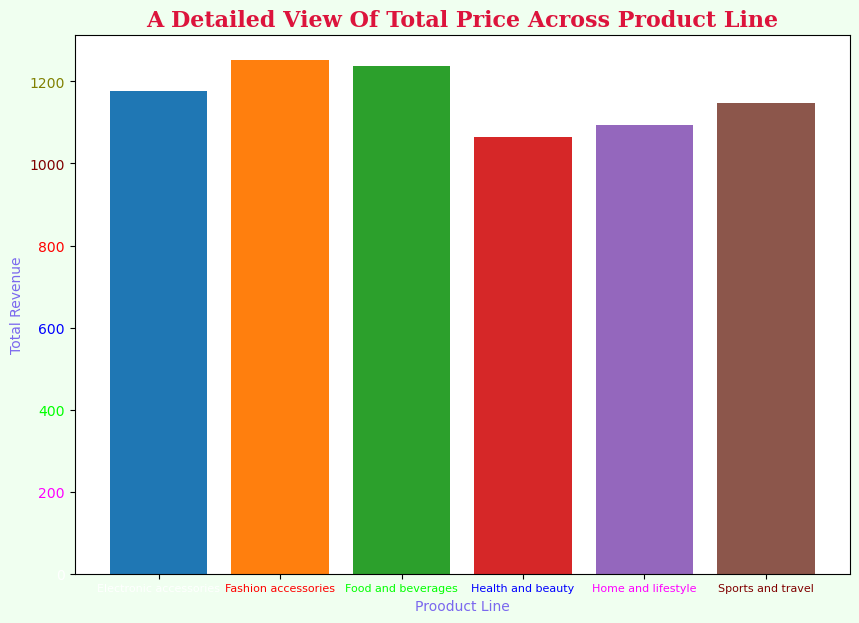

In [15]:
fig, ax = plt.subplots(figsize=(10,7))

fig.patch.set_facecolor('#f0FFF0')

ax.bar(rating.index, rating.values, color=colors_bar)
# Set the font size of x-tick labels
ax.tick_params(axis='x', labelsize=8)

ax.set_title("A Detailed View Of Total Price Across Product Line", fontdict=title_font)
ax.set_xlabel("Prooduct Line", fontdict=label_font)
ax.set_ylabel("Total Revenue", fontdict=label_font)

for label, color in zip(ax.get_xticklabels(), colors_xtick):
    label.set_color(color)

for label, color in zip(ax.get_yticklabels(), colors_ytick):
    label.set_color(color)

plt.show()

In [16]:
p_tax = df.groupby('Product line')['Tax 5%'].sum()

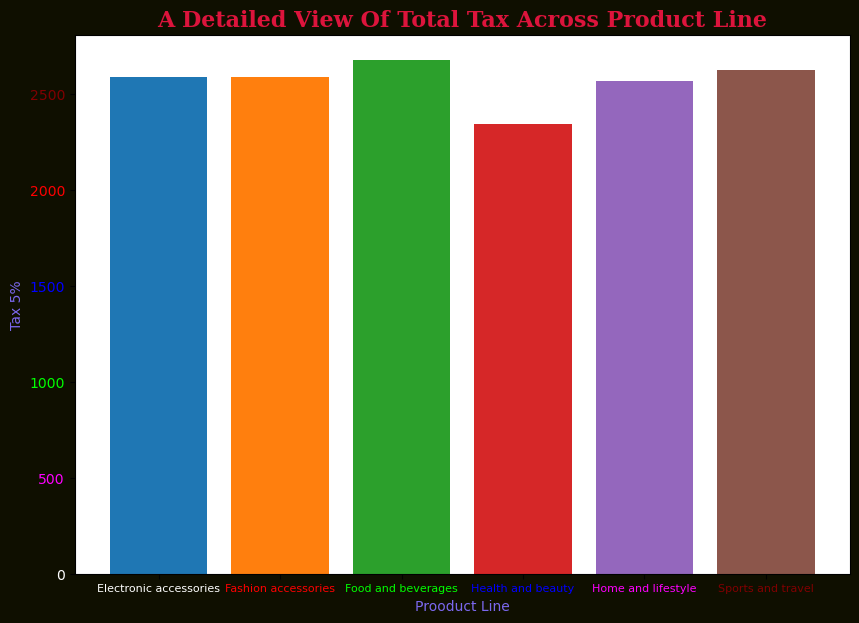

In [17]:
fig, ax = plt.subplots(figsize=(10,7))

fig.patch.set_facecolor('#0f0F00')

ax.bar(p_tax.index, p_tax.values, color=colors_bar)
# Set the font size of x-tick labels
ax.tick_params(axis='x', labelsize=8)

ax.set_title("A Detailed View Of Total Tax Across Product Line", fontdict=title_font)
ax.set_xlabel("Prooduct Line", fontdict=label_font)
ax.set_ylabel("Tax 5%", fontdict=label_font)

for label, color in zip(ax.get_xticklabels(), colors_xtick):
    label.set_color(color)

for label, color in zip(ax.get_yticklabels(), colors_ytick):
    label.set_color(color)

plt.show()

In [18]:
df.columns

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment',
       'cogs', 'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

In [19]:
p_gincome = df.groupby('Product line')['gross income'].sum()

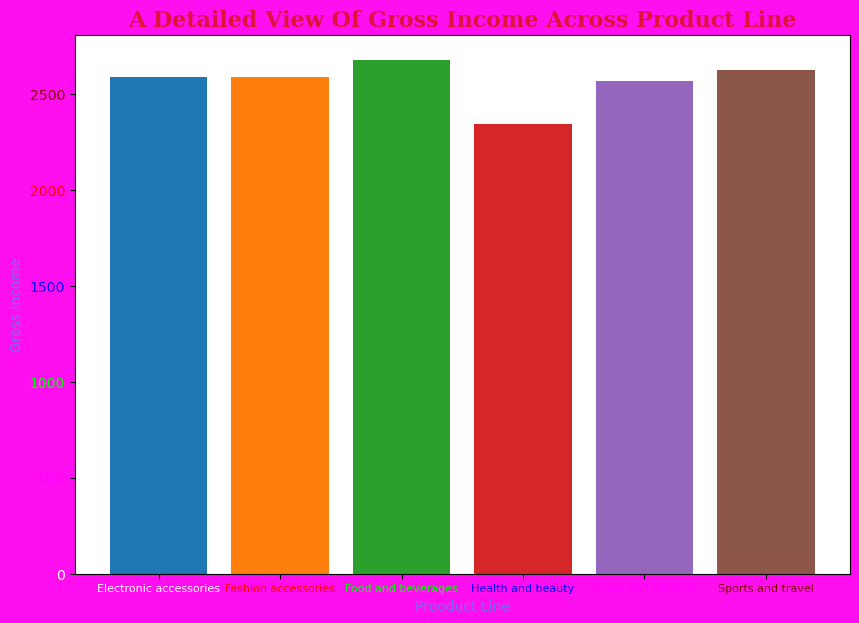

In [20]:
fig, ax = plt.subplots(figsize=(10,7))

fig.patch.set_facecolor('#FF0FF0')

ax.bar(p_gincome.index, p_gincome.values, color=colors_bar)
# Set the font size of x-tick labels
ax.tick_params(axis='x', labelsize=8)

ax.set_title("A Detailed View Of Gross Income Across Product Line", fontdict=title_font)
ax.set_xlabel("Prooduct Line", fontdict=label_font)
ax.set_ylabel("Gross Income", fontdict=label_font)

for label, color in zip(ax.get_xticklabels(), colors_xtick):
    label.set_color(color)

for label, color in zip(ax.get_yticklabels(), colors_ytick):
    label.set_color(color)

plt.show()

In [21]:
# Data for City and Branch count
branch_counts = df.groupby(['City', 'Branch']).size().unstack()

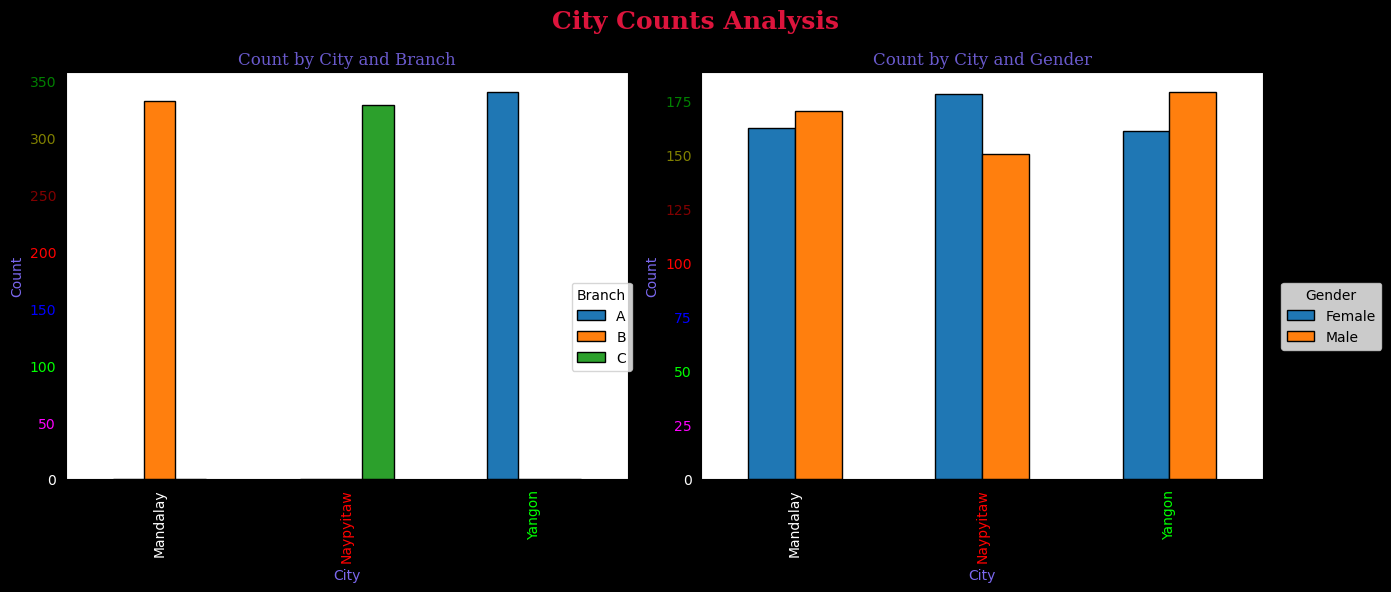

In [22]:
# Create a figure with two subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
fig.patch.set_color('#000000')

branch_counts.plot(kind='bar', stacked=False, ax=ax[0], edgecolor='black')
ax[0].set_title('Count by City and Branch', fontdict=subtitle_font)
ax[0].legend(title='Branch', bbox_to_anchor=(1.02, 0.5))
ax[0].set_xlabel('City', fontdict = label_font)
ax[0].set_ylabel('Count', fontdict = label_font)
for label, color in zip(ax[0].get_xticklabels(), colors_xtick):
    label.set_color(color)

for label, color in zip(ax[0].get_yticklabels(), colors_ytick):
    label.set_color(color)
    
# Data for City and Gender count
gender_counts = df.groupby(['City', 'Gender']).size().unstack()
gender_counts.plot(kind='bar', stacked=False, ax=ax[1], edgecolor='black')
ax[1].set_title('Count by City and Gender', fontdict=subtitle_font)
ax[1].legend(title='Gender', bbox_to_anchor=(1.02, 0.5))
ax[1].set_xlabel('City', fontdict = label_font)
ax[1].set_ylabel('Count', fontdict = label_font)
for label, color in zip(ax[1].get_xticklabels(), colors_xtick):
    label.set_color(color)

for label, color in zip(ax[1].get_yticklabels(), colors_ytick):
    label.set_color(color)
    
# Add a super title for the entire figure
fig.suptitle('City Counts Analysis', fontsize=18, fontweight='bold', family='serif', color='#DC143C')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 1])  # Adjust rect to fit the super title

plt.show()


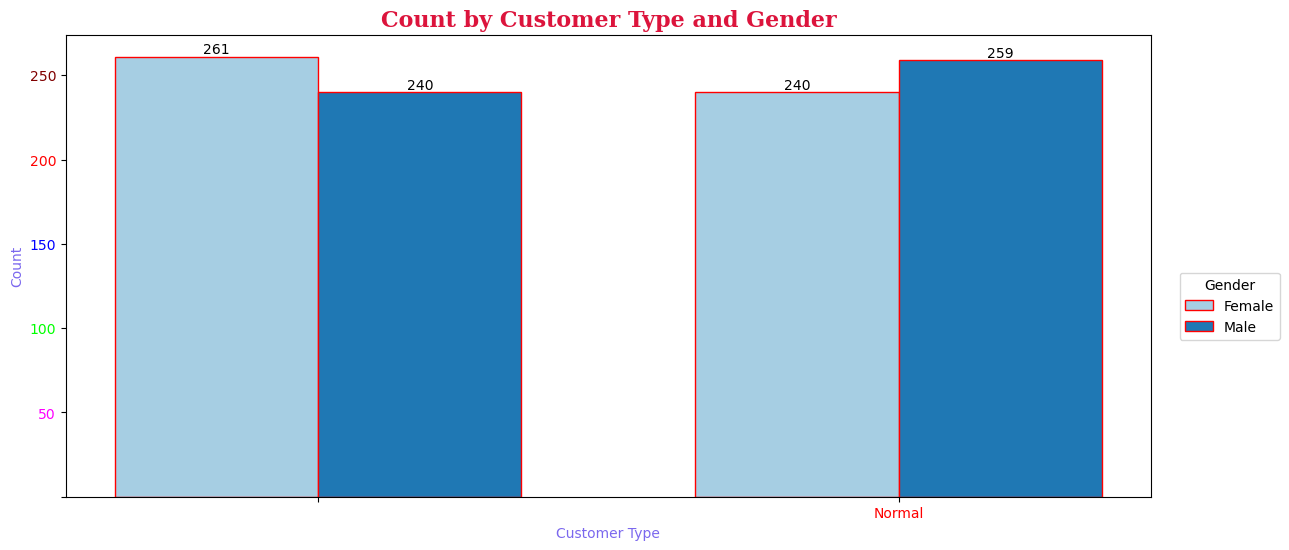

In [23]:
# Aggregate data by Customer type and Gender
data = df.groupby(['Customer type', 'Gender']).size().unstack().fillna(0)

# Get unique values for Customer type and Gender
customer_types = data.index
genders = data.columns

# Create a color map for Gender
colors = plt.cm.Paired(np.arange(len(genders)))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(14, 6))
#fig.patch.set_color('#000000')  # Set background color of the figure

# Plot bars for each Gender
bar_width = 0.35
x = np.arange(len(customer_types))

for i, gender in enumerate(genders):
    counts = data[gender]
    bars = ax.bar(x + i * bar_width, counts, width=bar_width, label=gender, color=colors[i], edgecolor='red')

    # Add bar labels
    ax.bar_label(bars)

# Customize the plot
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(customer_types)
ax.set_xlabel('Customer Type', fontdict=label_font)
ax.set_ylabel('Count', fontdict=label_font)
ax.set_title('Count by Customer Type and Gender', fontdict=title_font)
ax.legend(title='Gender', bbox_to_anchor=(1.02, 0.5))

for label, color in zip(ax.get_xticklabels(), colors_xtick):
    label.set_color(color)

for label, color in zip(ax.get_yticklabels(), colors_ytick):
    label.set_color(color)
    
plt.show()

### Percentage of Gender in Data

In [24]:
g_count = df['Gender'].value_counts()

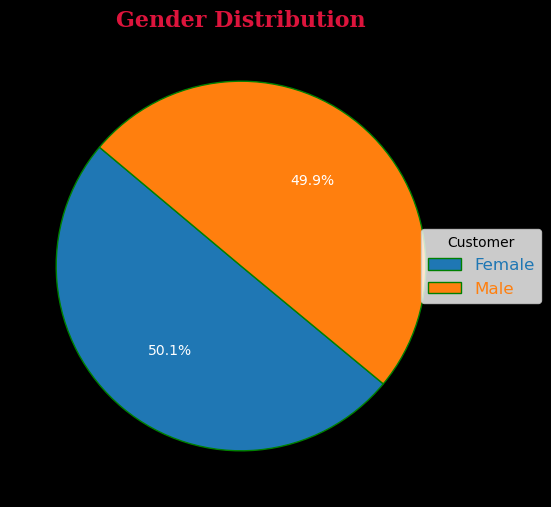

In [25]:
# Create a figure with two subplots
fig, ax = plt.subplots(figsize=(14, 6))
fig.patch.set_color('#000000')

labels=g_count.index
# Pie chart on the first subplot
ax.pie(g_count, autopct='%1.1f%%', colors=colors_bar,
          startangle=140, wedgeprops=dict(edgecolor='green'),textprops=dict(color='#ffffff'))

ax.set_title('Gender Distribution', fontdict=title_font)

# Adding a custom legend

legend_elements = [Patch(facecolor=color, edgecolor='green', label=label) for color, label in zip(colors_bar, labels)]
# Adding a custom legend
legend = ax.legend(handles=legend_elements, title='Customer', bbox_to_anchor=(1.02, 0.5), loc='center', fontsize='12')

# Set the color of legend text from the predefined list
for text, color in zip(legend.get_texts(), colors_bar):
    text.set_color(color)

plt.show()


In [26]:
c_count = df['City'].value_counts()

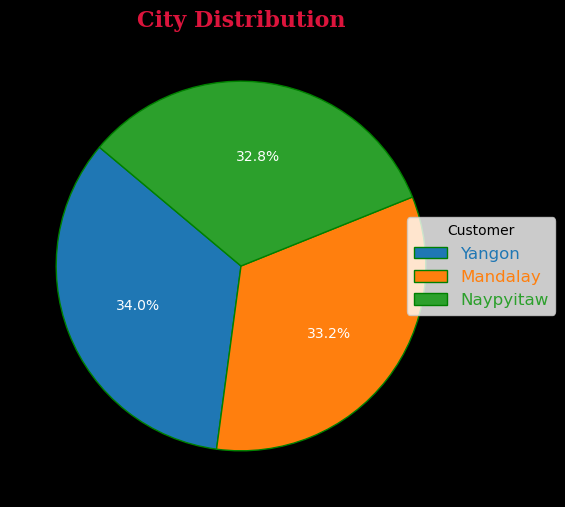

In [27]:
# Create a figure with one subplot
fig, ax = plt.subplots(figsize=(14, 6))
fig.patch.set_color('#000000')  # Set the background color of the figure

labels=c_count.index
# Pie chart on the subplot
wedges, texts, autotexts = ax.pie(c_count, autopct='%1.1f%%', colors=colors_bar,
                                  startangle=140, wedgeprops=dict(edgecolor='green'), textprops=dict(color='#ffffff'))

ax.set_title('City Distribution', fontdict=title_font)


# Adding a custom legend

legend_elements = [Patch(facecolor=color, edgecolor='green', label=label) for color, label in zip(colors_bar, labels)]
# Adding a custom legend
legend = ax.legend(handles=legend_elements, title='Customer', bbox_to_anchor=(1.02, 0.5), loc='center', fontsize='12')

# Set the color of legend text from the predefined list
for text, color in zip(legend.get_texts(), colors_bar):
    text.set_color(color)

plt.show()


### Distribution of Product Line

In [28]:
p_count = df['Product line'].value_counts()

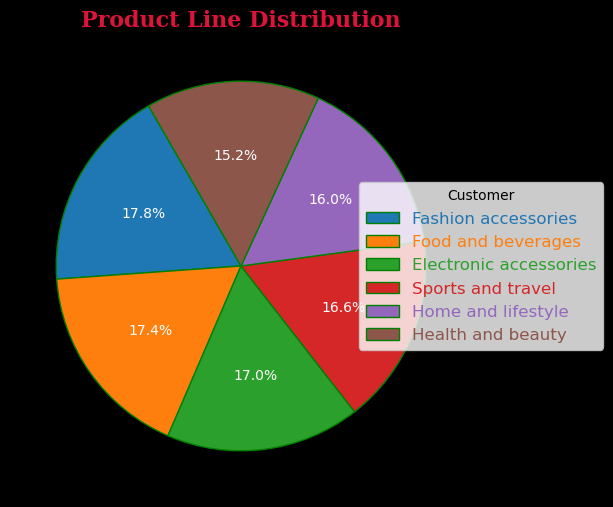

In [29]:
# Create a figure with one subplot
fig, ax = plt.subplots(figsize=(14, 6))
fig.patch.set_color('#000000')  # Set the background color of the figure

labels=p_count.index
# Pie chart on the subplot
wedges, texts, autotexts = ax.pie(p_count, autopct='%1.1f%%', colors=colors_bar,
                                  startangle=120, wedgeprops=dict(edgecolor='green'), textprops=dict(color='#ffffff'))

ax.set_title('Product Line Distribution', fontdict=title_font)

# Adding a custom legend

legend_elements = [Patch(facecolor=color, edgecolor='green', label=label) for color, label in zip(colors_bar, labels)]
# Adding a custom legend
legend = ax.legend(handles=legend_elements, title='Customer', bbox_to_anchor=(1.02, 0.5), loc='center', fontsize='12')

# Set the color of legend text from the predefined list
for text, color in zip(legend.get_texts(), colors_bar):
    text.set_color(color)

plt.show()


## Branch Distribution

In [30]:
b_count = df['Branch'].value_counts()

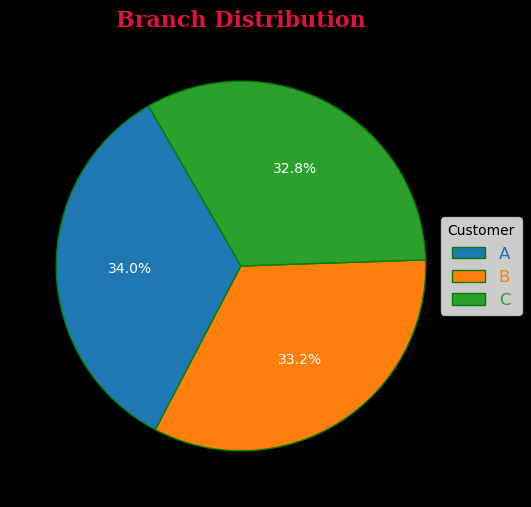

In [31]:
# Create a figure with one subplot
fig, ax = plt.subplots(figsize=(14, 6))
fig.patch.set_color('#000000')  # Set the background color of the figure

labels=b_count.index
# Pie chart on the subplot
wedges, texts, autotexts = ax.pie(b_count, autopct='%1.1f%%', colors=colors_bar,
                                  startangle=120, wedgeprops=dict(edgecolor='green'), textprops=dict(color='#ffffff'))

ax.set_title('Branch Distribution', fontdict=title_font)

# Adding a custom legend

legend_elements = [Patch(facecolor=color, edgecolor='green', label=label) for color, label in zip(colors_bar, labels)]
# Adding a custom legend
legend = ax.legend(handles=legend_elements, title='Customer', bbox_to_anchor=(1.02, 0.5), loc='center', fontsize='12')

# Set the color of legend text from the predefined list
for text, color in zip(legend.get_texts(), colors_bar):
    text.set_color(color)

plt.show()


## Customer Type Distribution

In [32]:
c_type_count = df['Customer type'].value_counts()

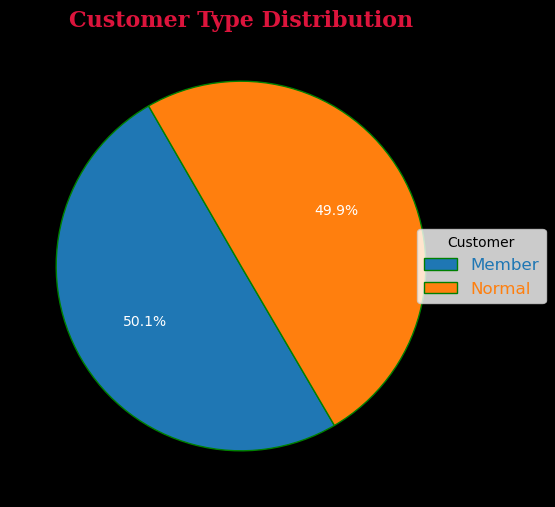

In [33]:
# Create a figure with one subplot
fig, ax = plt.subplots(figsize=(16, 6))
fig.patch.set_color('#000000')  # Set the background color of the figure

labels=c_type_count.index
# Pie chart on the subplot
wedges, texts, autotexts = ax.pie(c_type_count, autopct='%1.1f%%', colors=colors_bar,
                                  startangle=120, wedgeprops=dict(edgecolor='green'), textprops=dict(color='#ffffff'))

ax.set_title('Customer Type Distribution', fontdict=title_font)


legend_elements = [Patch(facecolor=color, edgecolor='green', label=label) for color, label in zip(colors_bar, labels)]
# Adding a custom legend
legend = ax.legend(handles=legend_elements, title='Customer', bbox_to_anchor=(1.02, 0.5), loc='center', fontsize='12')

# Set the color of legend text from the predefined list
for text, color in zip(legend.get_texts(), colors_bar):
    text.set_color(color)

plt.show()


## Distribution Of unit Price By Product Line

In [34]:
# Prepare data for plotting
product_lines = df['Product line'].unique()

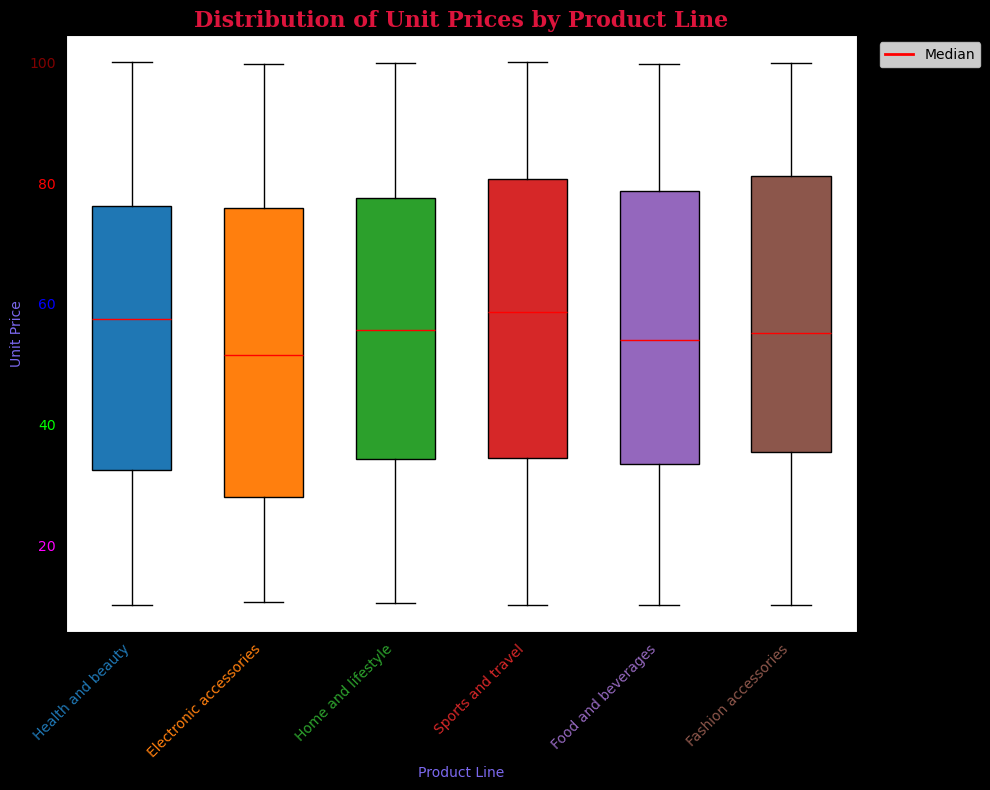

In [35]:
# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 8))
fig.patch.set_color('#000000')

# Box Plot
box_data = [df[df['Product line'] == product]['Unit price'] for product in product_lines]
# Plot each box with a different color
box_colors = colors_bar[:len(product_lines)]  
for i, data in enumerate(box_data):
    boxprops = dict(facecolor=box_colors[i], color='black')
    whiskerprops = dict(color='black')
    medianprops = dict(color='red')
    ax.boxplot(data, positions=[i+1], widths=0.6, patch_artist=True,
               boxprops=boxprops, whiskerprops=whiskerprops, medianprops=medianprops)

# Customize legend for boxplot
handles = [plt.Line2D([0], [0], color='red', lw=2, linestyle='-')]
ax.legend(handles, ['Median'], bbox_to_anchor=(1.02, 1))

# Set title and labels
ax.set_title('Distribution of Unit Prices by Product Line', fontdict=title_font)
ax.set_xlabel('Product Line', fontdict=label_font)
ax.set_ylabel('Unit Price', fontdict=label_font)

# Customize x-ticks
ax.set_xticks(range(1, len(product_lines) + 1))
ax.set_xticklabels(product_lines, rotation=45, ha='right')


for label, color in zip(ax.get_xticklabels(), colors_bar):
    label.set_color(color)

for label, color in zip(ax.get_yticklabels(), colors_ytick):
    label.set_color(color)


plt.tight_layout()

# Show plot
plt.show()


### Distribution Of Tax By Product Line

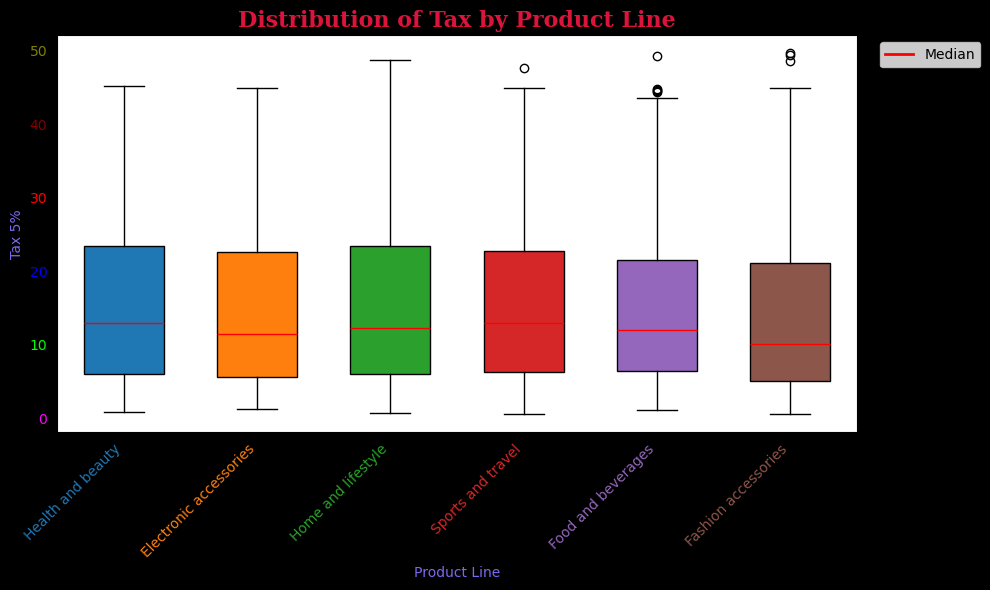

In [36]:
# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_color('#000000')

# Box Plot
box_data = [df[df['Product line'] == product]['Tax 5%'] for product in product_lines]
# Plot each box with a different color
box_colors = colors_bar[:len(product_lines)] 
for i, data in enumerate(box_data):
    boxprops = dict(facecolor=box_colors[i], color='black')
    whiskerprops = dict(color='black')
    medianprops = dict(color='red')
    ax.boxplot(data, positions=[i+1], widths=0.6, patch_artist=True,
               boxprops=boxprops, whiskerprops=whiskerprops, medianprops=medianprops)

# Customize legend for boxplot
handles = [plt.Line2D([0], [0], color='red', lw=2, linestyle='-')]
ax.legend(handles, ['Median'], bbox_to_anchor=(1.02, 1))

# Set title and labels
ax.set_title('Distribution of Tax by Product Line', fontdict=title_font)
ax.set_xlabel('Product Line', fontdict=label_font)
ax.set_ylabel('Tax 5%', fontdict=label_font)

# Customize x-ticks
ax.set_xticks(range(1, len(product_lines) + 1))
ax.set_xticklabels(product_lines, rotation=45, ha='right')


for label, color in zip(ax.get_xticklabels(), colors_bar):
    label.set_color(color)

for label, color in zip(ax.get_yticklabels(), colors_ytick):
    label.set_color(color)


plt.tight_layout()

# Show plot
plt.show()


In [37]:
df.columns

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment',
       'cogs', 'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

## Distrubution Of Rating By Product Line

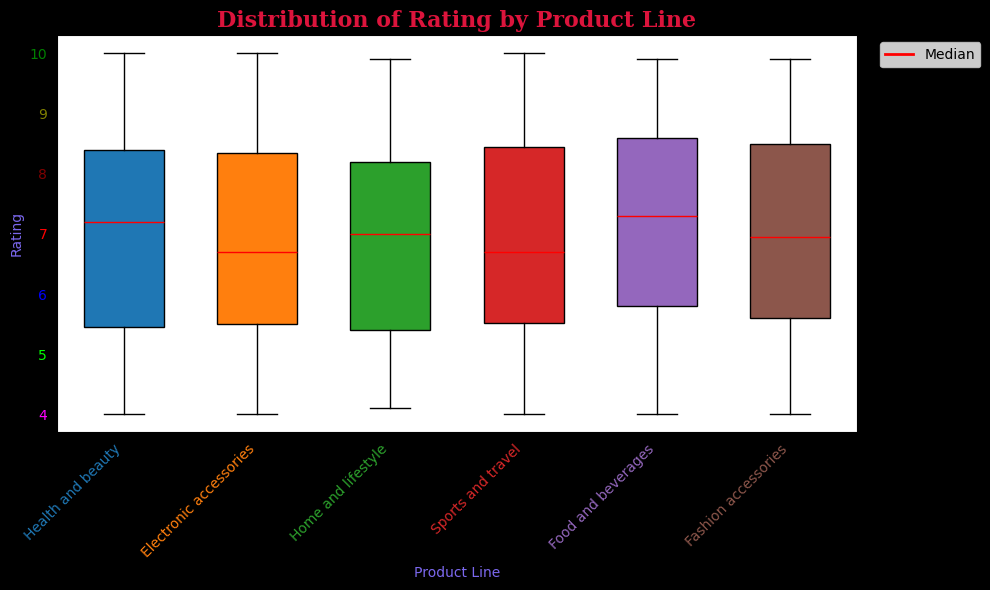

In [38]:
# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_color('#000000')

# Box Plot
box_data = [df[df['Product line'] == product]['Rating'] for product in product_lines]
# Plot each box with a different color
box_colors = colors_bar[:len(product_lines)] 
for i, data in enumerate(box_data):
    boxprops = dict(facecolor=box_colors[i], color='black')
    whiskerprops = dict(color='black')
    medianprops = dict(color='red')
    ax.boxplot(data, positions=[i+1], widths=0.6, patch_artist=True,
               boxprops=boxprops, whiskerprops=whiskerprops, medianprops=medianprops)

# Customize legend for boxplot
handles = [plt.Line2D([0], [0], color='red', lw=2, linestyle='-')]
ax.legend(handles, ['Median'], bbox_to_anchor=(1.02, 1))

# Set title and labels
ax.set_title('Distribution of Rating by Product Line', fontdict=title_font)
ax.set_xlabel('Product Line', fontdict=label_font)
ax.set_ylabel('Rating', fontdict=label_font)

# Customize x-ticks
ax.set_xticks(range(1, len(product_lines) + 1))
ax.set_xticklabels(product_lines, rotation=45, ha='right')


for label, color in zip(ax.get_xticklabels(), colors_bar):
    label.set_color(color)

for label, color in zip(ax.get_yticklabels(), colors_ytick):
    label.set_color(color)


plt.tight_layout()

# Show plot
plt.show()


## Distribution Of Quantity By Product Line

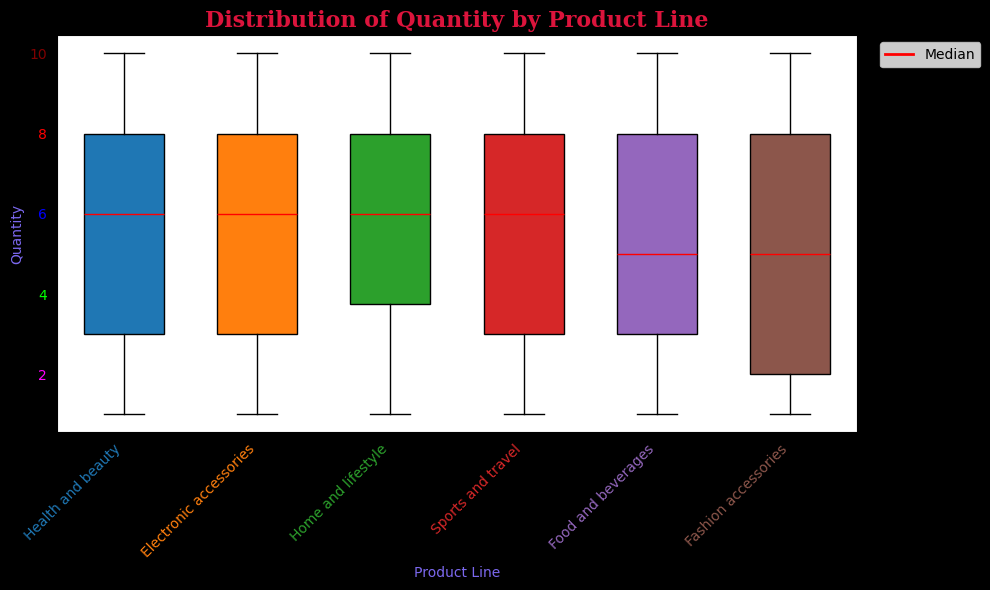

In [39]:
# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_color('#000000')

# Box Plot
box_data = [df[df['Product line'] == product]['Quantity'] for product in product_lines]
# Plot each box with a different color
box_colors = colors_bar[:len(product_lines)] 
for i, data in enumerate(box_data):
    boxprops = dict(facecolor=box_colors[i], color='black')
    whiskerprops = dict(color='black')
    medianprops = dict(color='red')
    ax.boxplot(data, positions=[i+1], widths=0.6, patch_artist=True,
               boxprops=boxprops, whiskerprops=whiskerprops, medianprops=medianprops)

# Customize legend for boxplot
handles = [plt.Line2D([0], [0], color='red', lw=2, linestyle='-')]
ax.legend(handles, ['Median'], bbox_to_anchor=(1.02, 1))

# Set title and labels
ax.set_title('Distribution of Quantity by Product Line', fontdict=title_font)
ax.set_xlabel('Product Line', fontdict=label_font)
ax.set_ylabel('Quantity', fontdict=label_font)

# Customize x-ticks
ax.set_xticks(range(1, len(product_lines) + 1))
ax.set_xticklabels(product_lines, rotation=45, ha='right')


for label, color in zip(ax.get_xticklabels(), colors_bar):
    label.set_color(color)

for label, color in zip(ax.get_yticklabels(), colors_ytick):
    label.set_color(color)


plt.tight_layout()

# Show plot
plt.show()


## Time Based Analysis

In [40]:
# Convert 'Time' to datetime format
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

In [41]:
# Extract hour from the 'Time' column
df['Hour'] = df['Time'].apply(lambda x: x.hour)

In [42]:
# Aggregate sales by hour
hourly_rating = df.groupby('Hour')['Rating'].sum().reset_index()

NameError: name 'cm' is not defined

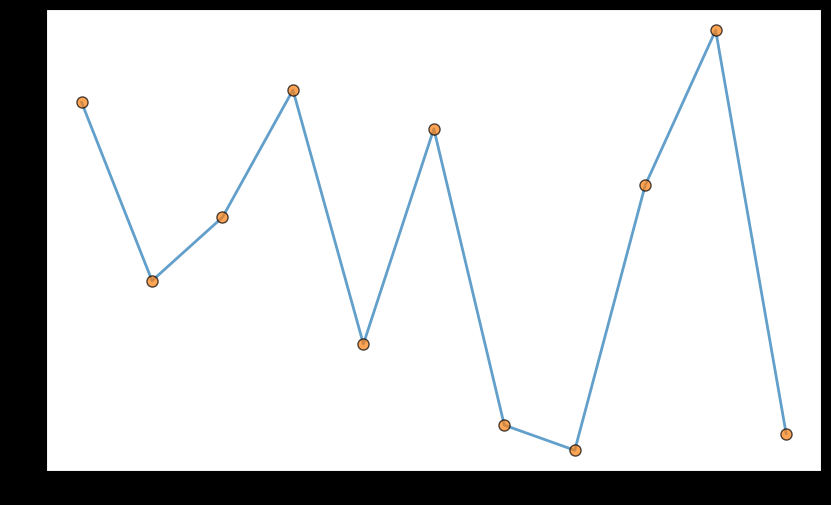

In [43]:

# Define color gradients for the line and markers
line_color = '#1f77b4'  # Blue color for the line
marker_color = '#ff7f0e'  # Orange color for the markers

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_color('#000000')  # Set figure background color

# Plot the line chart
ax.plot(hourly_rating['Hour'], hourly_rating['Rating'], marker='o', linestyle='-', 
        color=line_color, markerfacecolor=marker_color, markeredgecolor='black', 
        markersize=8, linewidth=2, alpha=0.7)

# Add a color gradient to the line
norm = plt.Normalize(hourly_rating['Hour'].min(), hourly_rating['Hour'].max())
cmap = cm.get_cmap('coolwarm')
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Hour of the Day')

# Add title and labels
ax.set_title('Total Rating by Hour of the Day', fontdict={'fontsize': 16, 'fontweight': 'bold', 'color': 'white'})
ax.set_xlabel('Hour of the Day', fontdict={'fontsize': 14, 'color': 'white'})
ax.set_ylabel('Total Rating', fontdict={'fontsize': 14, 'color': 'white'})

# Customize x-ticks and y-ticks
ax.set_xticks(range(24))
ax.set_xticklabels(range(24), rotation=45, ha='right', color='white')
ax.yaxis.set_tick_params(color='white')
ax.xaxis.set_tick_params(color='white')

# Customize grid
ax.grid(True, which='both', linestyle='--', linewidth=0.7, color='gray')

# Add data point annotations
for i, row in hourly_rating.iterrows():
    ax.text(row['Hour'], row['Rating'] + 1, str(row['Rating']), fontsize=10, color='white', ha='center')

# Add a vertical line to highlight specific hours (optional)
highlight_hour = 12
ax.axvline(x=highlight_hour, color='red', linestyle='--', linewidth=1.5, alpha=0.7)
ax.text(highlight_hour, max(hourly_rating['Rating']) * 0.9, f'Peak Hour: {highlight_hour}', 
        fontsize=12, color='red', ha='center', va='bottom')

# Set background color for the plot area
ax.set_facecolor('#1e1e1e')

# Show plot
plt.tight_layout()
plt.show()
